In [2]:
#import data and packages
import pandas as pd
df = pd.read_csv('ppd_complaints.csv')

In [3]:
df.head()

,complaint_id,date_received,district_occurrence,general_cap_classification,summary,incident_date_extract,incident_time_extract,objectid
0,19-0183,2019-04-29 04:00:00+00,1600.0,PHYSICAL ABUSE,"According to the complainant, on 04-25-19 at 1...",2019-04-25,10:00 PM,807
1,19-0184,2019-04-29 04:00:00+00,1600.0,CRIMINAL ALLEGATION,"According to the complainant, on 4-16-19 or 4-...",2019-04-16,05:00 PM,808
2,19-0185,2019-04-29 04:00:00+00,1400.0,DEPARTMENTAL VIOLATIONS,"According to the complainant, on 03-30-19 at 7...",2019-03-30,07:15 PM,809
3,19-0186,2019-04-29 04:00:00+00,1400.0,PHYSICAL ABUSE,"According to the complainant, on 4-10-19 at 8:...",2019-04-10,08:00 PM,810
4,19-0187,2019-05-02 04:00:00+00,600.0,LACK OF SERVICE,"According to the complainant, on 3-25-19, they...",2019-03-25,NaN,811


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3908 entries, 0 to 3907
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   complaint_id                3908 non-null   object 
 1   date_received               3908 non-null   object 
 2   district_occurrence         3790 non-null   float64
 3   general_cap_classification  3906 non-null   object 
 4   summary                     3908 non-null   object 
 5   incident_date_extract       3613 non-null   object 
 6   incident_time_extract       3099 non-null   object 
 7   objectid                    3908 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 244.4+ KB


In [5]:
df.describe()

,district_occurrence,objectid
count,3790.000000,3908.000000
mean,1942.744063,1954.500000
std,1434.528352,1128.286754
min,100.000000,1.000000
25%,900.000000,977.750000
50%,1800.000000,1954.500000
75%,2400.000000,2931.250000
max,9000.000000,3908.000000


Text(0, 0.5, 'Count')

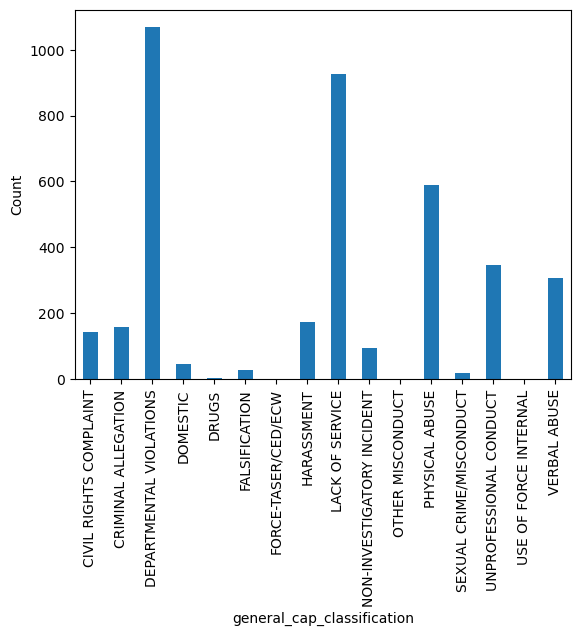

In [6]:
#grouping by complaint type
df.groupby(['general_cap_classification' ])['general_cap_classification'].count().plot(kind='bar').set_ylabel('Count')

In [7]:
#import matplotlib
import matplotlib.pyplot as plt

In [8]:
#drop columns that are irrelavant to our project/have a significant number of missing values
df = df.drop(['summary', 'incident_date_extract', 'incident_time_extract', 'district_occurrence'], axis=1)

In [9]:
#check out new dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3908 entries, 0 to 3907
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   complaint_id                3908 non-null   object
 1   date_received               3908 non-null   object
 2   general_cap_classification  3906 non-null   object
 3   objectid                    3908 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.2+ KB


In [10]:
#convert date_received column to datetime type
df['date_received'] = pd.to_datetime(df['date_received'])

In [11]:
complaint_type = 'PHYSICAL ABUSE'

filtered_data = df[df['general_cap_classification'] == complaint_type]
grouped_data = filtered_data.groupby('date_received').size()


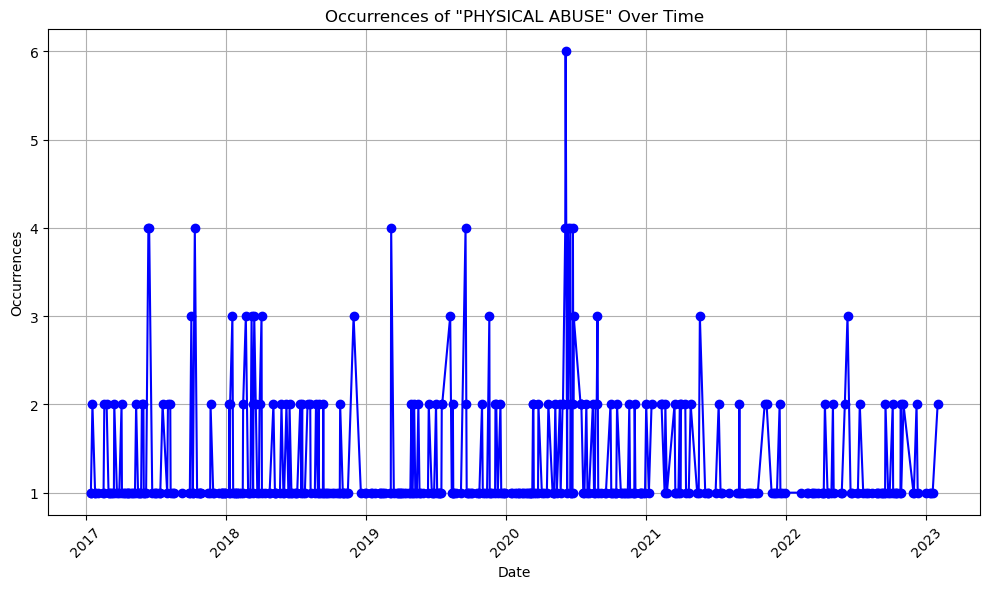

In [12]:
#plot occurences of physical abuse by date
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-', color='b')

plt.title(f'Occurrences of "PHYSICAL ABUSE" Over Time')
plt.xlabel('Date')
plt.ylabel('Occurrences')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [13]:
df.head()

,complaint_id,date_received,general_cap_classification,objectid
0,19-0183,2019-04-29 04:00:00+00:00,PHYSICAL ABUSE,807
1,19-0184,2019-04-29 04:00:00+00:00,CRIMINAL ALLEGATION,808
2,19-0185,2019-04-29 04:00:00+00:00,DEPARTMENTAL VIOLATIONS,809
3,19-0186,2019-04-29 04:00:00+00:00,PHYSICAL ABUSE,810
4,19-0187,2019-05-02 04:00:00+00:00,LACK OF SERVICE,811


In [14]:
df['month'] = pd.DatetimeIndex(df['date_received']).month

In [15]:
df.head()

,complaint_id,date_received,general_cap_classification,objectid,month
0,19-0183,2019-04-29 04:00:00+00:00,PHYSICAL ABUSE,807,4
1,19-0184,2019-04-29 04:00:00+00:00,CRIMINAL ALLEGATION,808,4
2,19-0185,2019-04-29 04:00:00+00:00,DEPARTMENTAL VIOLATIONS,809,4
3,19-0186,2019-04-29 04:00:00+00:00,PHYSICAL ABUSE,810,4
4,19-0187,2019-05-02 04:00:00+00:00,LACK OF SERVICE,811,5


In [16]:
df['year'] = pd.DatetimeIndex(df['date_received']).year

In [17]:
df.head()

,complaint_id,date_received,general_cap_classification,objectid,month,year
0,19-0183,2019-04-29 04:00:00+00:00,PHYSICAL ABUSE,807,4,2019
1,19-0184,2019-04-29 04:00:00+00:00,CRIMINAL ALLEGATION,808,4,2019
2,19-0185,2019-04-29 04:00:00+00:00,DEPARTMENTAL VIOLATIONS,809,4,2019
3,19-0186,2019-04-29 04:00:00+00:00,PHYSICAL ABUSE,810,4,2019
4,19-0187,2019-05-02 04:00:00+00:00,LACK OF SERVICE,811,5,2019


Text(0, 0.5, 'Count')

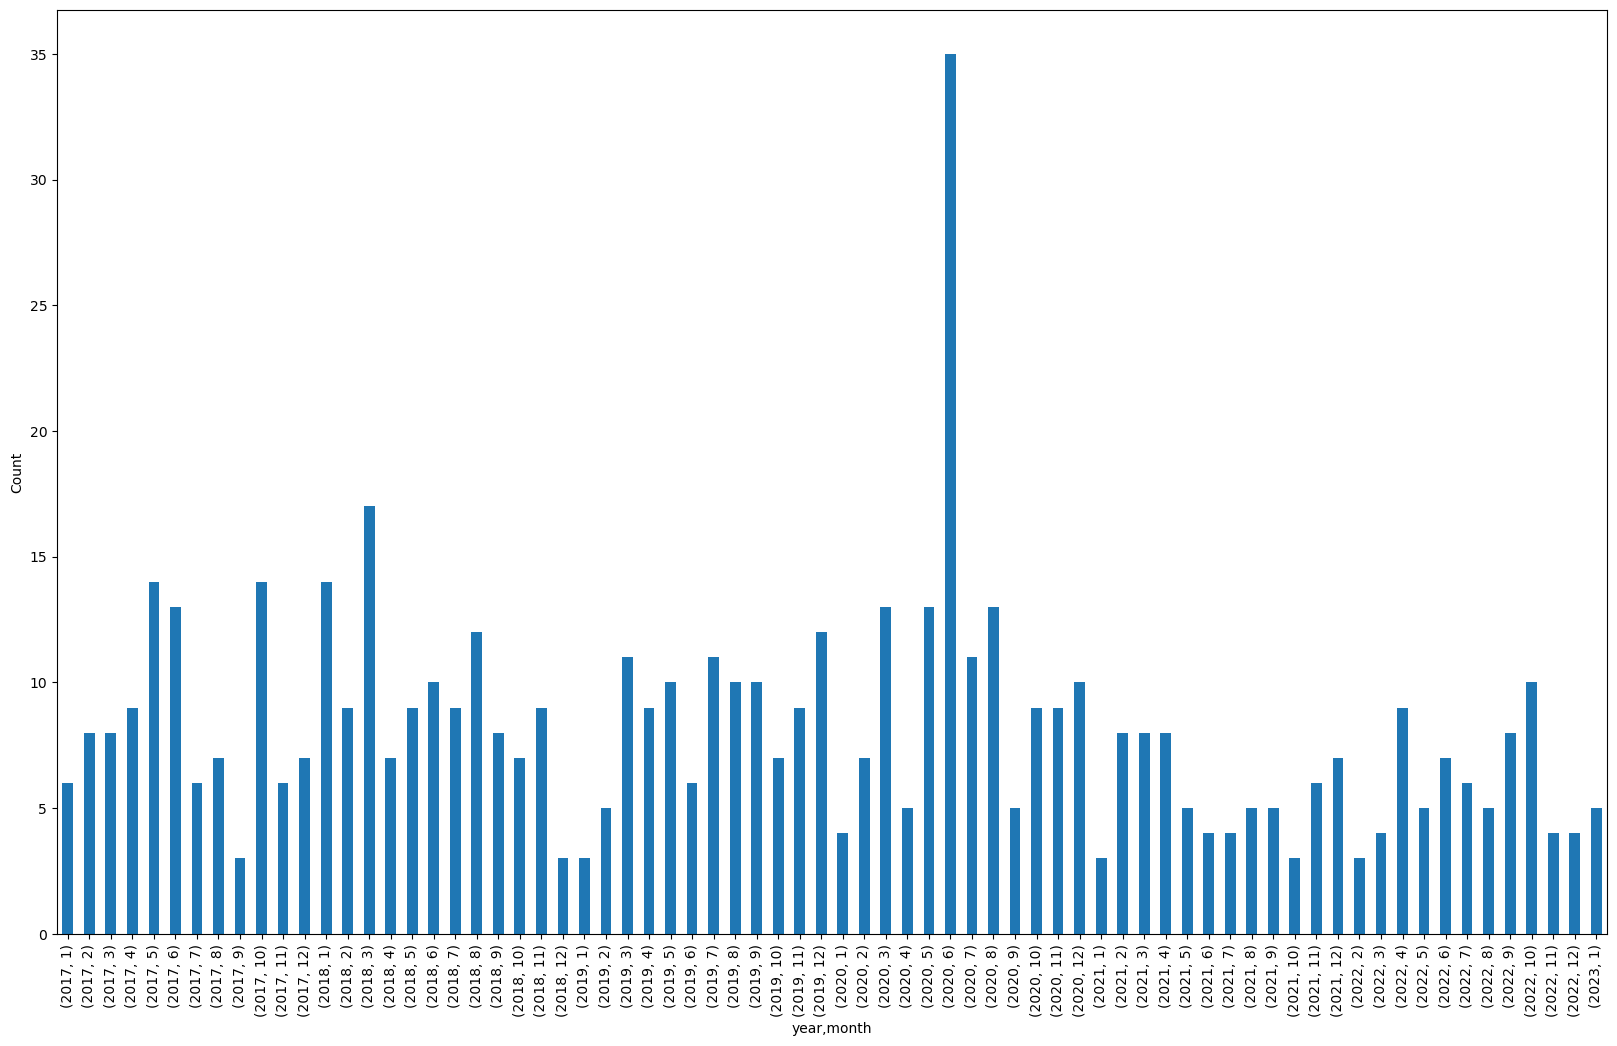

In [18]:
plt.figure(figsize=(20, 12))
df[df['general_cap_classification'] == complaint_type].groupby(['year', 'month'])['complaint_id'].count().plot(kind='bar').set_ylabel('Count')